# CarebyMom Model Development

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [24]:
df = pd.read_csv('/home/tinapyp/Development/CarebyMom/ml_model_dev/data/datagenerated.csv', sep=",")
df.head()

,Age,Pregnancy Duration,Weight(kg),Height(cm),BMI Score,Arm Circumference,Fundus Height,Heart Rate,Risk
0,32,15,58,169,20.142734,24,25,68,Normal
1,30,15,68,168,23.891098,24,32,61,Normal
2,25,8,74,185,21.545839,23,32,90,Normal
3,21,28,56,169,19.704671,25,28,64,Normal
4,25,23,68,172,23.193814,24,31,87,Normal


In [25]:
df.tail()

,Age,Pregnancy Duration,Weight(kg),Height(cm),BMI Score,Arm Circumference,Fundus Height,Heart Rate,Risk
1313,21,30,48,139,24.844867,24,26,83,Normal
1314,31,10,59,158,23.771919,24,29,75,Normal
1315,30,20,54,157,21.952497,24,25,75,High
1316,31,18,45,143,21.734124,25,31,78,Normal
1317,32,16,43,146,20.081354,24,27,70,High


In [26]:
df.dtypes

Age                     int64
Pregnancy Duration      int64
Weight(kg)              int64
Height(cm)              int64
BMI Score             float64
Arm Circumference       int64
Fundus Height           int64
Heart Rate              int64
Risk                   object
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1318 non-null   int64  
 1   Pregnancy Duration  1318 non-null   int64  
 2   Weight(kg)          1318 non-null   int64  
 3   Height(cm)          1318 non-null   int64  
 4   BMI Score           1318 non-null   float64
 5   Arm Circumference   1318 non-null   int64  
 6   Fundus Height       1318 non-null   int64  
 7   Heart Rate          1318 non-null   int64  
 8   Risk                1318 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 92.8+ KB


In [28]:
df.shape

(1318, 9)

In [29]:
#Miss Valuse
df.isnull().sum()

Age                   0
Pregnancy Duration    0
Weight(kg)            0
Height(cm)            0
BMI Score             0
Arm Circumference     0
Fundus Height         0
Heart Rate            0
Risk                  0
dtype: int64

In [30]:
#Duplicated value 
data_dup = df.duplicated().any()
data_dup

False

In [32]:
df = df.drop_duplicates()

In [33]:
data_dup = df.duplicated().any()
data_dup

False

In [34]:
ca_val=[]
co_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)

In [35]:
#Categorical Data
ca_val

['Arm Circumference', 'Fundus Height', 'Risk']

In [36]:
df['Risk'].unique()

array(['Normal', 'High'], dtype=object)

In [37]:
co_val

['Age',
 'Pregnancy Duration',
 'Weight(kg)',
 'Height(cm)',
 'BMI Score',
 'Heart Rate']

In [38]:
df['Age'].unique()

array([32, 30, 25, 21, 34, 28, 33, 35, 22, 29, 23, 31, 26, 27, 24])

In [39]:
df['Risk'].unique()

array(['Normal', 'High'], dtype=object)

In [40]:
Risk = {
    "Normal": 0,
    "High": 1,
}

# apply using map
df["Risk"] = df["Risk"].map(Risk).astype(float)
df

,Age,Pregnancy Duration,Weight(kg),Height(cm),BMI Score,Arm Circumference,Fundus Height,Heart Rate,Risk
0,32,15,58,169,20.142734,24,25,68,0.0
1,30,15,68,168,23.891098,24,32,61,0.0
2,25,8,74,185,21.545839,23,32,90,0.0
3,21,28,56,169,19.704671,25,28,64,0.0
4,25,23,68,172,23.193814,24,31,87,0.0
...,...,...,...,...,...,...,...,...,...
1313,21,30,48,139,24.844867,24,26,83,0.0
1314,31,10,59,158,23.771919,24,29,75,0.0
1315,30,20,54,157,21.952497,24,25,75,1.0
1316,31,18,45,143,21.734124,25,31,78,0.0


In [42]:
df['Risk'].value_counts()

Risk
0.0    905
1.0    413
Name: count, dtype: int64

In [25]:
df.describe()

,Age,BS_Opt,BodyTemp,HeartRate,RiskLevel
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,29.403226,8.382419,98.709677,73.958525,1.746544
std,13.829416,2.865653,1.424740,8.267085,0.838066
min,10.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,7.500000,98.000000,76.000000,1.000000
75%,35.000000,7.900000,98.000000,80.000000,3.000000
max,70.000000,19.000000,103.000000,90.000000,3.000000


<Axes: >

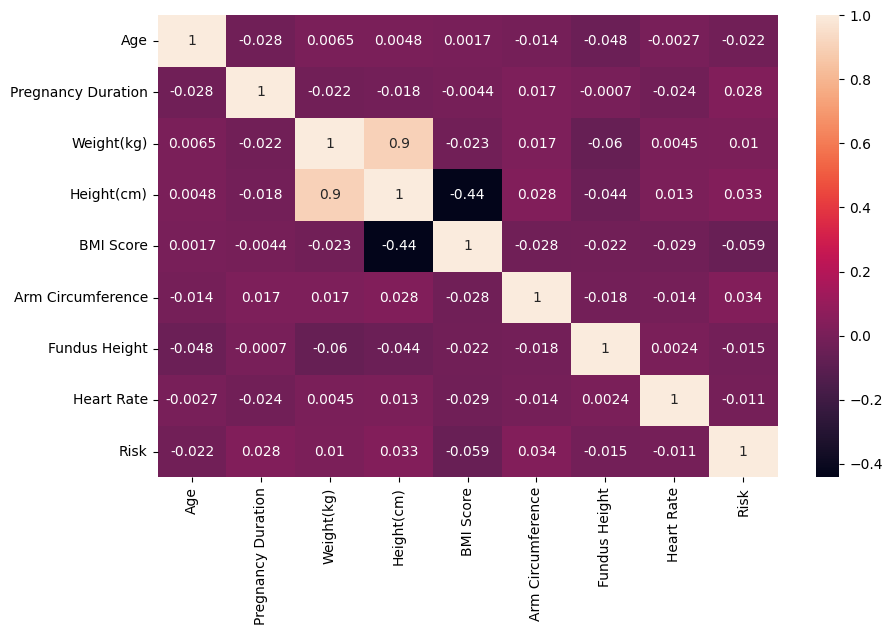

In [43]:
cor = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

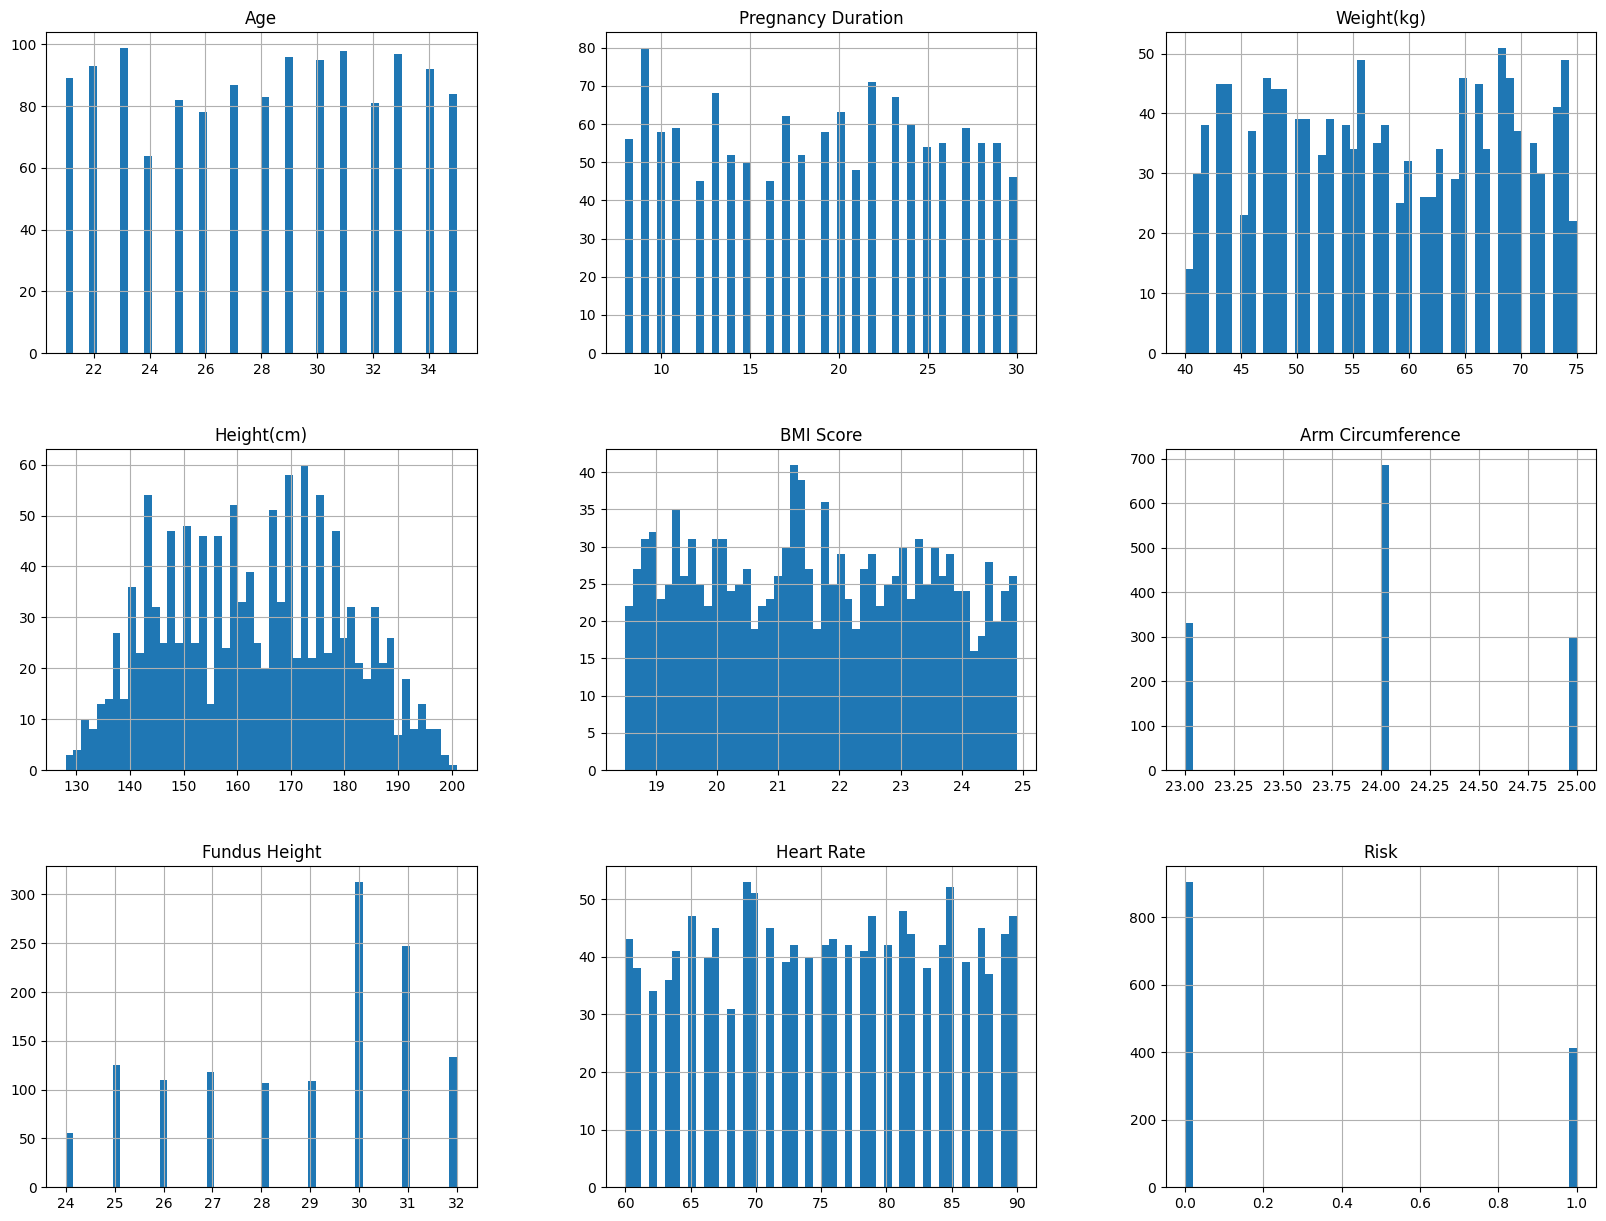

In [44]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

/tmp/ipykernel_28890/2517785073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk', data=df, palette='viridis')


<Axes: xlabel='Risk', ylabel='count'>

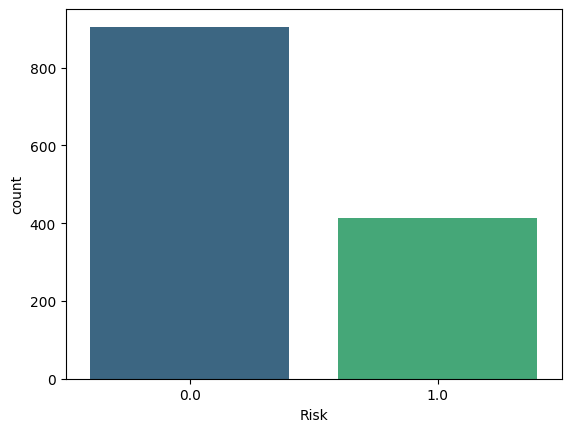

In [46]:
sns.countplot(x='Risk', data=df, palette='viridis')

In [47]:
X = df.drop('Risk',axis=1)
y = df['Risk']

In [48]:
X

,Age,Pregnancy Duration,Weight(kg),Height(cm),BMI Score,Arm Circumference,Fundus Height,Heart Rate
0,32,15,58,169,20.142734,24,25,68
1,30,15,68,168,23.891098,24,32,61
2,25,8,74,185,21.545839,23,32,90
3,21,28,56,169,19.704671,25,28,64
4,25,23,68,172,23.193814,24,31,87
...,...,...,...,...,...,...,...,...
1313,21,30,48,139,24.844867,24,26,83
1314,31,10,59,158,23.771919,24,29,75
1315,30,20,54,157,21.952497,24,25,75
1316,31,18,45,143,21.734124,25,31,78


In [49]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1313    0.0
1314    0.0
1315    1.0
1316    0.0
1317    1.0
Name: Risk, Length: 1318, dtype: float64

In [50]:
#Splitting The Dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=42)
y_test

677     0.0
979     0.0
610     0.0
49      0.0
1283    1.0
       ... 
141     0.0
1015    0.0
613     0.0
543     0.0
139     1.0
Name: Risk, Length: 396, dtype: float64

In [51]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',X.shape)
print(f'Testing Shape y:',y.shape)

Training Shape x: (922, 8)
Testing Shape x: (396, 8)
*****___________*****___________*****
Training Shape y: (1318, 8)
Testing Shape y: (1318,)


In [56]:
#normalisasi data dengan StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [57]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))

y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(X_test)))

Train accuracy: 0.6865509761388287
Test accuracy: 0.6893939393939394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

/home/tinapyp/Depedencies/miniconda3/envs/carebymom/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tinapyp/Depedencies/miniconda3/envs/carebymom/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tinapyp/Depedencies/miniconda3/envs/carebymom/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [58]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 0.5580808080808081
[1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 

In [59]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 0.6818181818181818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [60]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

print("Train accuracy:",nb.score(X_train,y_train))
print("Test accuracy:",nb.score(X_test,y_test))

y_pred = nb.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy: 0.6854663774403471
Test accuracy: 0.6843434343434344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 